link do walmart sales dataset: https://www.kaggle.com/datasets/rutuspatel/walmart-dataset-retail

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle
from turtle import color
import datetime as dt

walmartg_sales_df = pd.read_csv('Walmart_Store_sales.csv')

In [2]:
walmartg_sales_df['Date'] = pd.to_datetime(walmartg_sales_df['Date'])
walmartg_sales_df['DateNum'] = walmartg_sales_df['Date'].map(dt.datetime.toordinal)

Adding additional column "DateNum" that converts date to numerical format in order to plot graphs with date on one of the axis.

## Exercise 1

Show basic informations about dataset.

In [3]:
walmartg_sales_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DateNum
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,733894
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,734108
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,733822
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,733829
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,733895


In [4]:
walmartg_sales_df.info()
walmartg_sales_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   DateNum       6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 452.6 KB


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DateNum
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,734305.846154
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,294.760296
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,733782.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,734057.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,734305.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,734564.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,734847.000000


First I use head(), info() and describe() pandas functions to get basic information about the dataset.

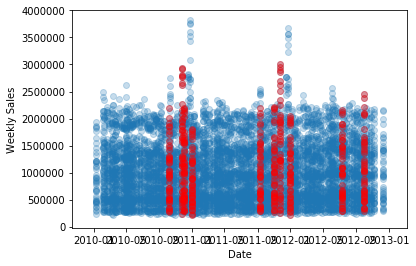

In [9]:
plt.scatter(walmartg_sales_df['Date'], walmartg_sales_df['Weekly_Sales'], alpha=0.25)
holidays = walmartg_sales_df.loc[(walmartg_sales_df['Holiday_Flag'] == 1)]
plt.scatter(holidays['Date'], holidays['Weekly_Sales'], c='red', alpha=0.35)
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

Here we can see how holiday sales affect weekly sales. I would say that it doesn't have such huge impact on weekly sales as I thought. This is data from all 45 stores. As I want to predict weekly sales by using polynominal regression, I think I wouldn't get good results if I use all the data.

## Exercise 2

Find best store and atributes that might be in corelation with weekly sales. 

In [165]:
weekly_sales_mean = {}

for i in range(1, 46):
    storeI = walmartg_sales_df.loc[(walmartg_sales_df['Store'] == i)]
    weekly_sales_mean[i] = storeI['Weekly_Sales'].mean()

best = [max(weekly_sales_mean, key=weekly_sales_mean.get), max(weekly_sales_mean.values())]
print(f"Best Store id: {best[0]}\nMean weekly sales: {best[1]}")
bestStore = walmartg_sales_df.loc[(walmartg_sales_df['Store'] == best[0])]


Best Store id: 20
Mean weekly sales: 2107676.8703496507


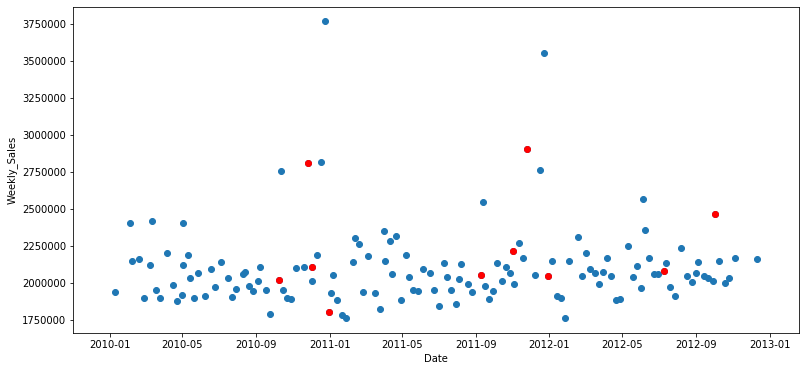

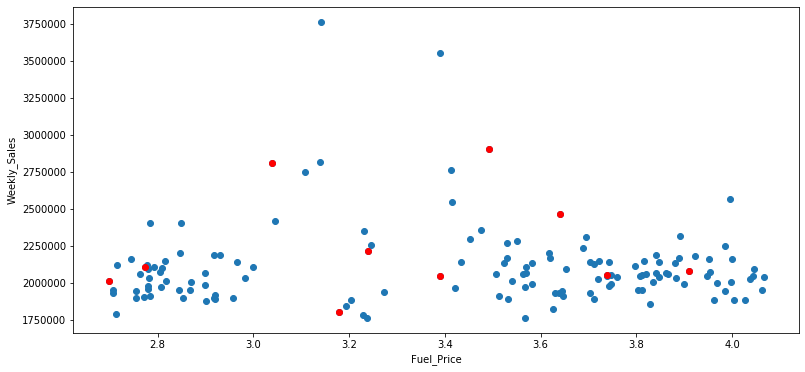

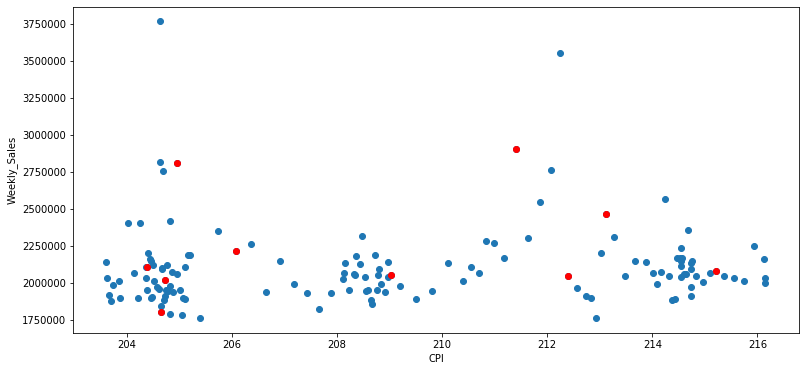

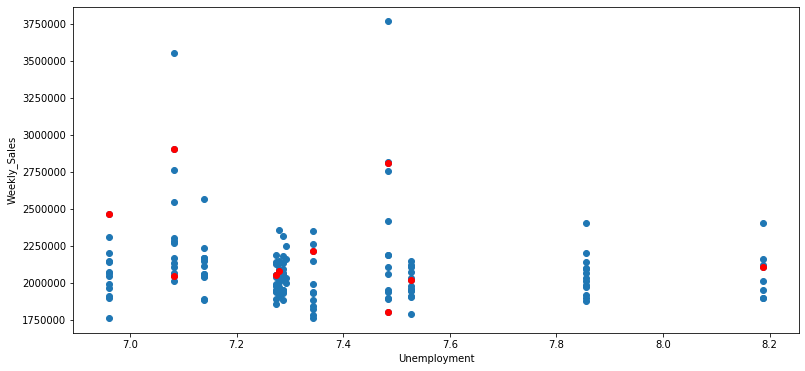

In [166]:
holidays = bestStore.loc[(bestStore['Holiday_Flag'] == 1)]

xl = "Date"
yl = "Weekly_Sales"

plt.scatter(bestStore[xl], bestStore[yl])
plt.scatter(holidays[xl], holidays[yl], c='red')
plt.xlabel(xl)
plt.ylabel(yl)
plt.show()


xl = "Fuel_Price"
yl = "Weekly_Sales"

plt.scatter(bestStore[xl], bestStore[yl])
plt.scatter(holidays[xl], holidays[yl], c='red')
plt.xlabel(xl)
plt.ylabel(yl)
plt.show()


xl = "CPI"
yl = "Weekly_Sales"

plt.scatter(bestStore[xl], bestStore[yl])
plt.scatter(holidays[xl], holidays[yl], c='red')
plt.xlabel(xl)
plt.ylabel(yl)
plt.show()


xl = "Unemployment"
yl = "Weekly_Sales"

plt.scatter(bestStore[xl], bestStore[yl])
plt.scatter(holidays[xl], holidays[yl], c='red')
plt.xlabel(xl)
plt.ylabel(yl)
plt.show()

While considering plots above I rejected attribute named Unemployment, because in my opinion the shape of plotted points is not good for fitting polynominal regression.

## Exercise 3
a) Create and train simple regression model of date, CPI and fuel price to weekly sales.  
b) Evaluate and visualise created models.  
c) Create and plot higher order polynomial regression models.

In [167]:
#a)
Xdate = bestStore.DateNum.values.reshape(-1, 1)
Xfuel = bestStore.Fuel_Price.values.reshape(-1, 1)
Xcpi = bestStore.CPI.values.reshape(-1, 1)
Xunempl =bestStore.Unemployment.values.reshape(-1, 1)
y = bestStore.Weekly_Sales.values.reshape(-1, 1)

model = LinearRegression()

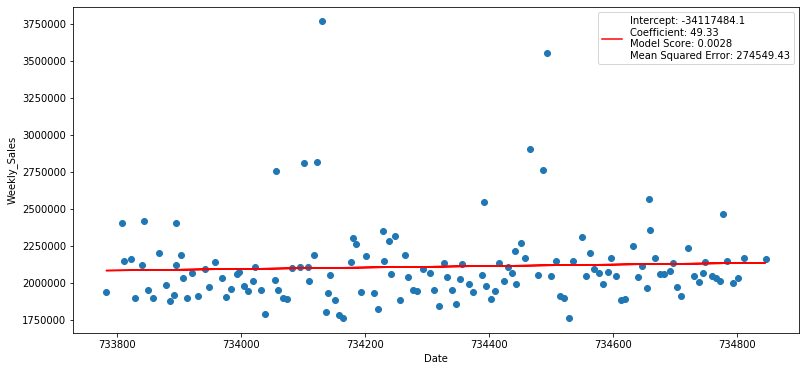

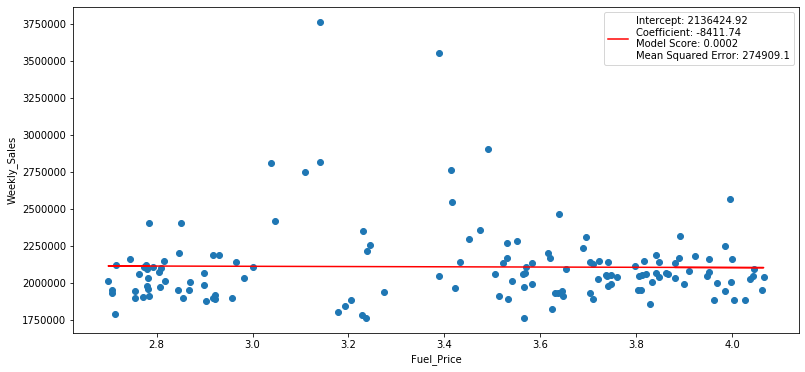

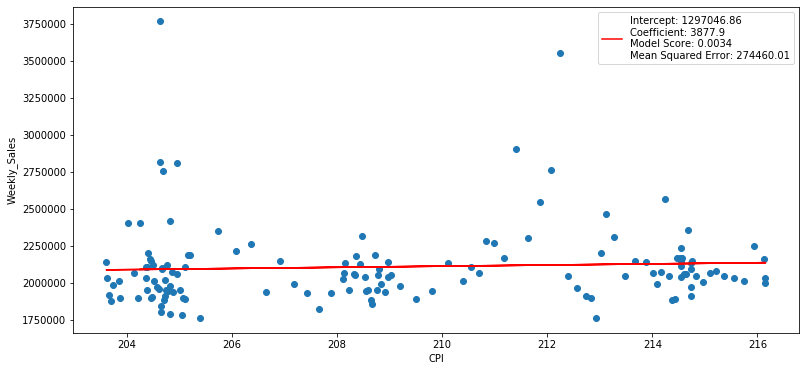

In [168]:
#b)
plt.rcParams['figure.figsize'] = [13, 6]

t = {'Date': Xdate, 'Fuel_Price': Xfuel, 'CPI': Xcpi}

for key in t:
    model.fit(t[key], y)
    model.predict(t[key])

    lbl = (f"Intercept: {model.intercept_[0].round(2)}\n" 
    + f"Coefficient: {float(model.coef_.round(2))}\n"
    + f"Model Score: {model.score(t[key], y).round(4)}\n"
    + f"Mean Squared Error: {np.sqrt(mean_squared_error(y, model.predict(t[key]))).round(2)}")
    
    plt.scatter(t[key], y)
    plt.plot(t[key], model.predict(t[key]), color='red', label=lbl)
    plt.xlabel(key)
    plt.ylabel("Weekly_Sales")
    plt.legend(loc='upper right')
    plt.show()

After plotting those three plots it's difficult to decide which attribute use to further analysis as each of them have very small model score. That's why I decided to make polynominal regression with all three and than decide which one is worth analysing.

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


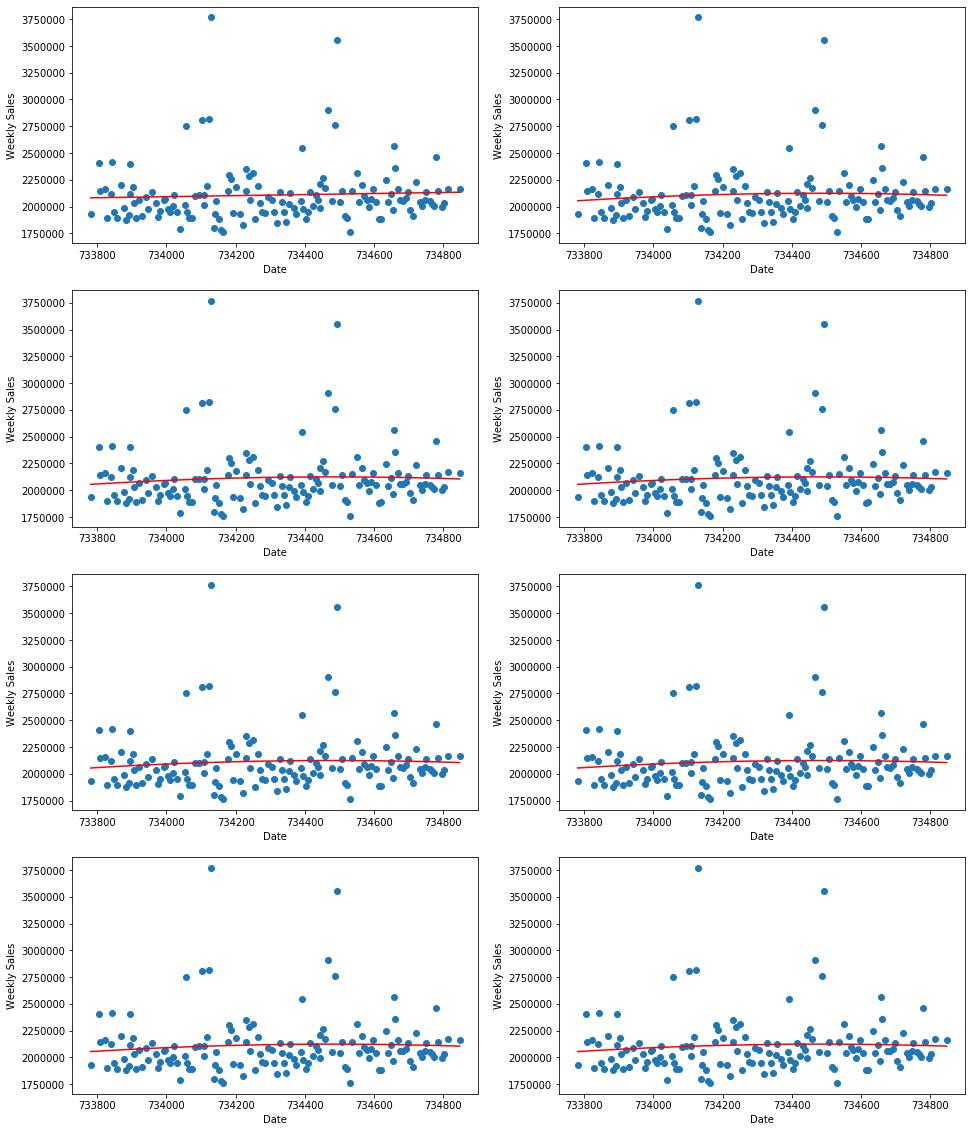

In [169]:
#c) Date

plt.rcParams['figure.figsize'] = [16, 20]

X = Xdate

for order in range(1,9):
    poly = PolynomialFeatures(degree=order, include_bias=False)

    poly_features = poly.fit_transform(X)

    model.fit(poly_features, y)

    y_predicted = model.predict(poly_features)

    po_model = np.poly1d(np.polyfit(X.flatten(), y_predicted.flatten(), deg=order))
    x = np.linspace(X.flatten().min(), X.flatten().max(), len(X.flatten()))
    
    plt.subplot(4, 2, order)
    plt.scatter(X, y)
    plt.plot(x, po_model(x), c='red')
    plt.xlabel("Date")
    plt.ylabel("Weekly Sales")

plt.show()

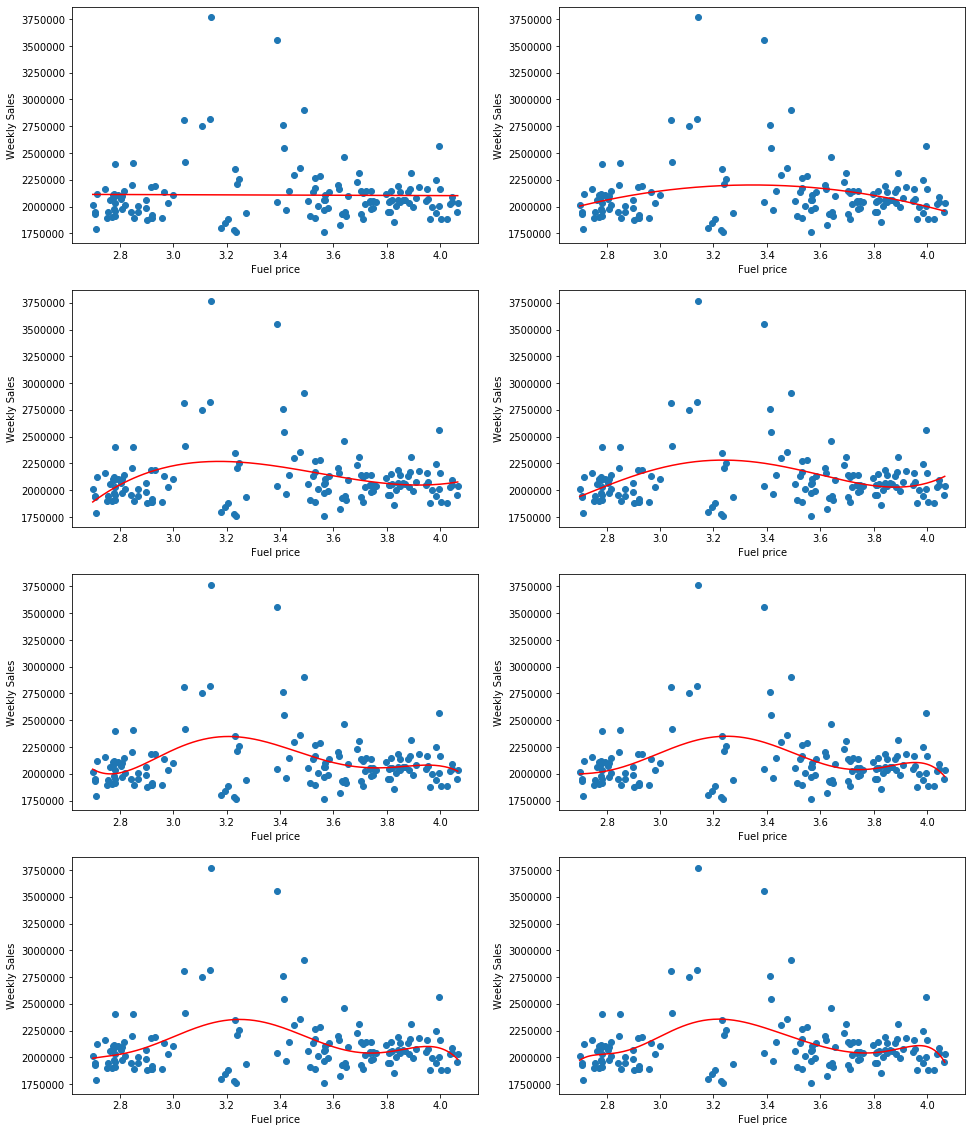

In [170]:
#c) Fuel price

plt.rcParams['figure.figsize'] = [16, 20]

X = Xfuel

for order in range(1,9):
    poly = PolynomialFeatures(degree=order, include_bias=False)

    poly_features = poly.fit_transform(X)

    model.fit(poly_features, y)

    y_predicted = model.predict(poly_features)

    po_model = np.poly1d(np.polyfit(X.flatten(), y_predicted.flatten(), deg=order))
    x = np.linspace(X.flatten().min(), X.flatten().max(), len(X.flatten()))
    
    plt.subplot(4, 2, order)
    plt.scatter(X, y)
    plt.plot(x, po_model(x), c='red')
    plt.xlabel("Fuel price")
    plt.ylabel("Weekly Sales")

plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


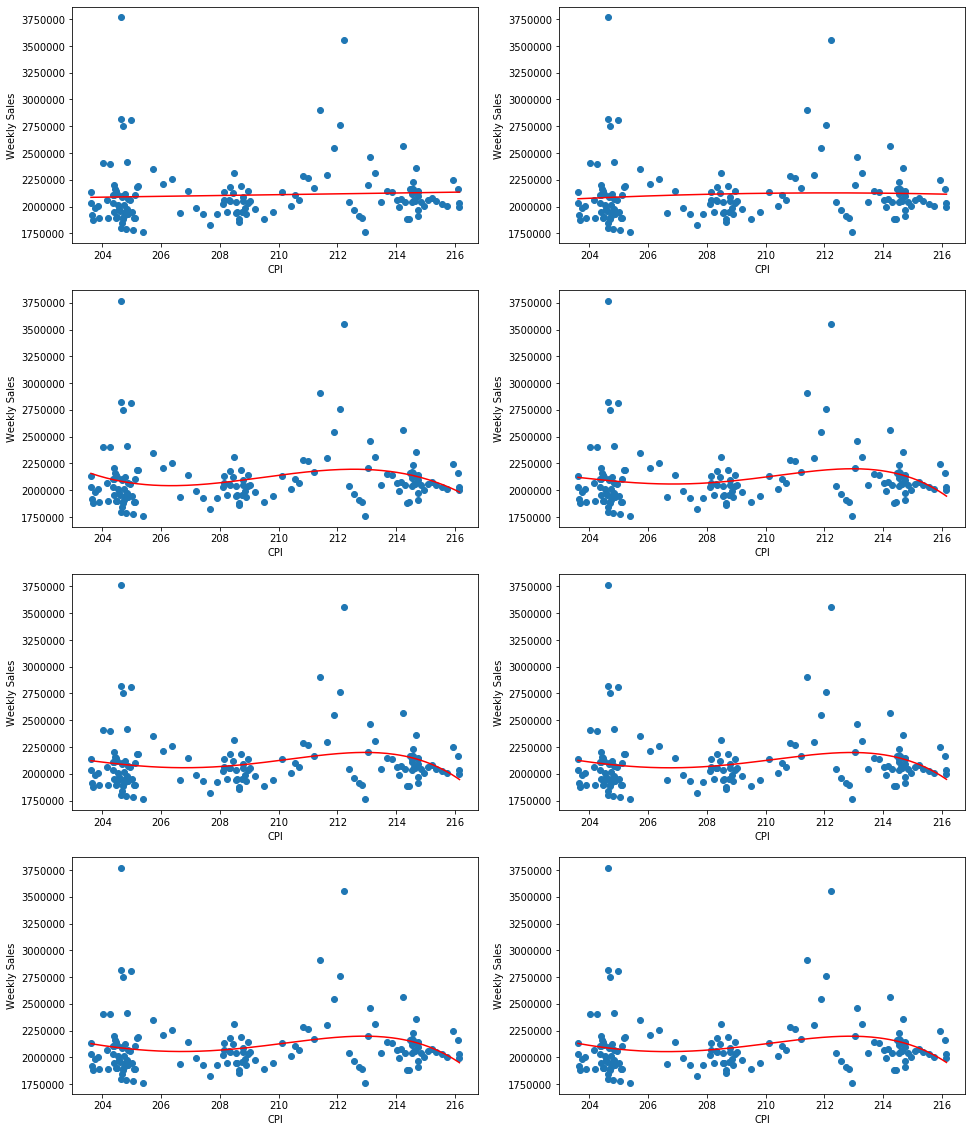

In [171]:
#c) CPI

plt.rcParams['figure.figsize'] = [16, 20]

X = Xcpi

for order in range(1,9):
    poly = PolynomialFeatures(degree=order, include_bias=False)

    poly_features = poly.fit_transform(X)

    model.fit(poly_features, y)

    y_predicted = model.predict(poly_features)

    po_model = np.poly1d(np.polyfit(X.flatten(), y_predicted.flatten(), deg=order))
    x = np.linspace(X.flatten().min(), X.flatten().max(), len(X.flatten()))
   
    plt.subplot(4, 2, order)
    plt.scatter(X, y)
    plt.plot(x, po_model(x), c='red') 
    plt.xlabel("CPI")
    plt.ylabel("Weekly Sales")

plt.show()

Seeing all this plots I choose the Fuel price attribute as I think it has the most interesting polynominal fit.

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Applications/anaconda3/lib/python3.7/site-package

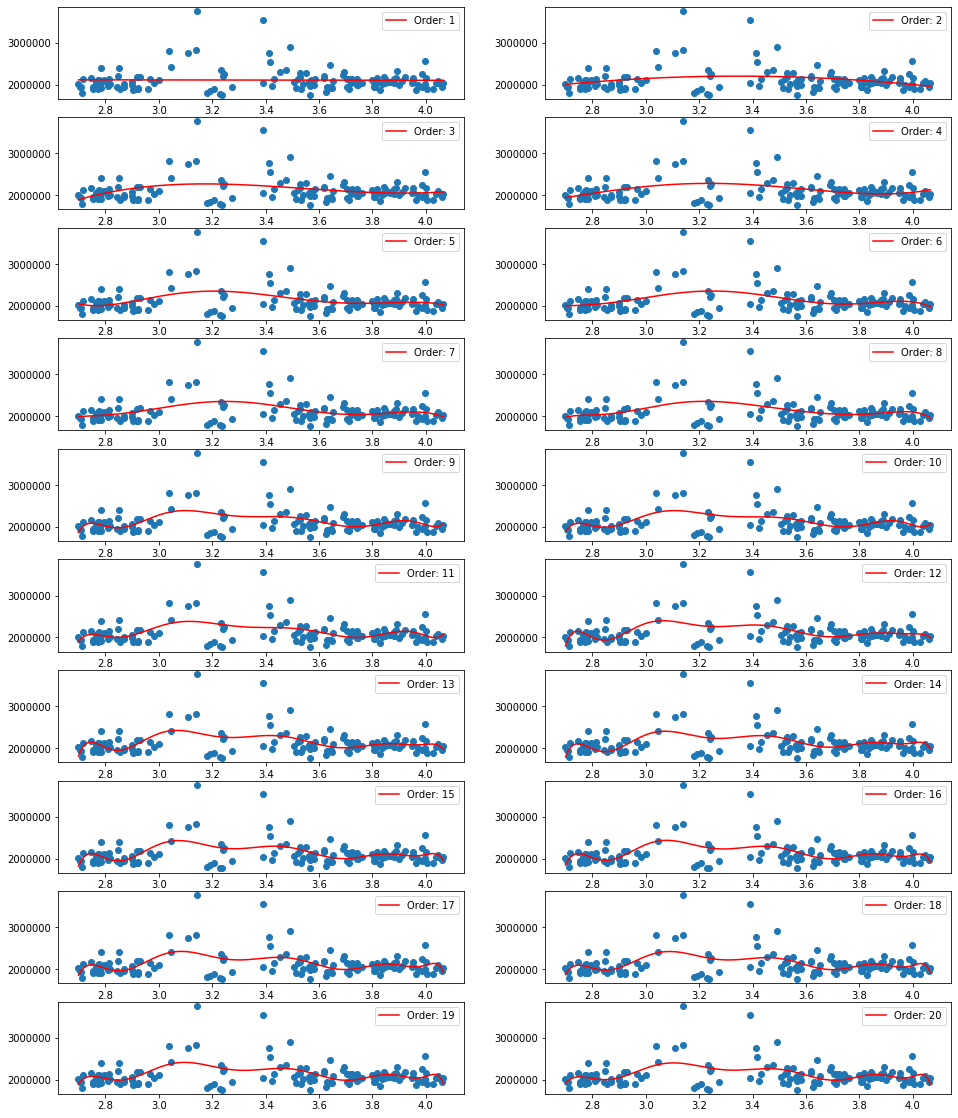

In [172]:
#Fuel price higher poly

plt.rcParams['figure.figsize'] = [16, 20]
model_err = []

X = Xfuel

highest_order = 20

for order in range(1, highest_order+1):
    poly = PolynomialFeatures(degree=order, include_bias=False)

    poly_features = poly.fit_transform(X)

    model.fit(poly_features, y)

    y_predicted = model.predict(poly_features)

    model_err.append(np.sqrt(mean_squared_error(y, y_predicted)))

    po_model = np.poly1d(np.polyfit(X.flatten(), y_predicted.flatten(), deg=order))
    x = np.linspace(X.flatten().min(), X.flatten().max(), len(X.flatten()))
    
    plt.subplot(highest_order/2, 2, order)
    plt.scatter(X, y)
    plt.plot(x, po_model(x), c='red', label=f"Order: {order}")
    plt.legend()

plt.show()

Initially while choosing the order of polynominal regression I instantly checked how the error is changing, incrementing order by 2 till I find the spot where the error starts to increase. But I found that it can slightly increase and then decrease more in the next step, so I decided to generate so much polinominals.

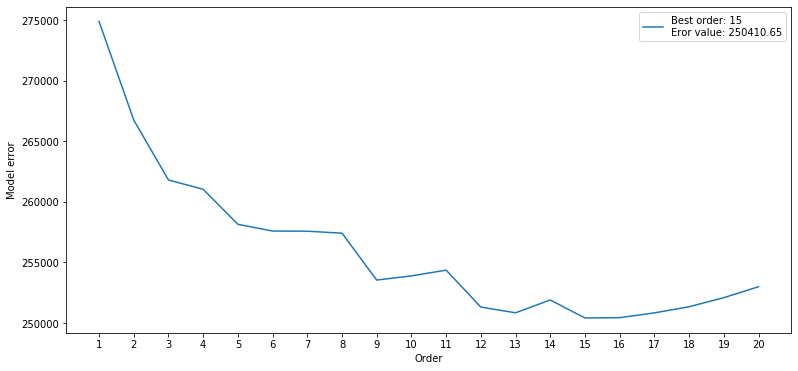

In [173]:
b = min(model_err)
for enum, val in enumerate(model_err):
    if val == b:
        b = enum + 1

lbl = f"Best order: {b}\nEror value: {min(model_err).round(2)}"
plt.rcParams['figure.figsize'] = [13, 6]
plt.plot(np.arange(1, len(model_err)+1, dtype=int), model_err, label=lbl)
plt.xticks(np.arange(1, len(model_err)+1))
plt.xlabel("Order")
plt.ylabel("Model error")
plt.legend()
plt.show()

Calculating mean squared error for different degree polynominal regression we can see that on 15th iterration MSE is the smallest, which theoretically  means it is the best model.

## Exercise 4
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

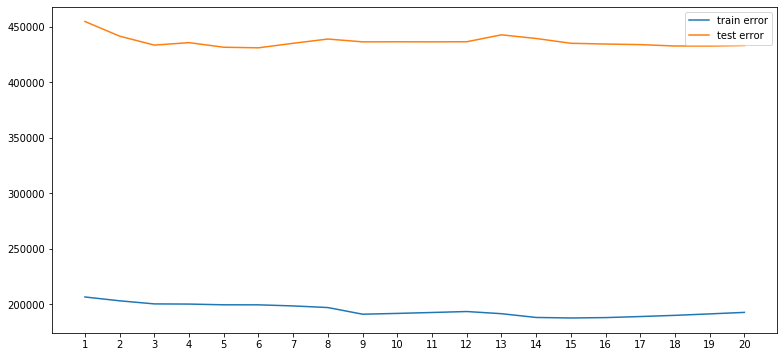

Best train order: 15
Train error value: 187355.25

Best test order: 6
Test error value: 431149.96


In [174]:
#a)

testErr, trainErr = [], []

X = Xfuel

for order in range(1, highest_order+1):
    poly = PolynomialFeatures(degree=order, include_bias=False)

    poly_features = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=12)

    model.fit(X_train, y_train)

    y_predicted_train = model.predict(X_train)
    y_predicted_test = model.predict(X_test)

    trainErr.append(np.sqrt(mean_squared_error(y_train, y_predicted_train)))
    testErr.append(np.sqrt(mean_squared_error(y_test, y_predicted_test)))


plt.plot(np.arange(1, len(trainErr)+1, dtype=int), trainErr, label='train error')
plt.plot(np.arange(1, len(testErr)+1, dtype=int), testErr, label='test error')
plt.xticks(np.arange(1, len(trainErr)+1))
plt.legend()
plt.show()

btrain = min(trainErr)
for enum, val in enumerate(trainErr):
    if val == btrain:
        btrain = enum + 1

btest = min(testErr)
for enum, val in enumerate(testErr):
    if val == btest:
        btest = enum + 1

print(f"Best train order: {btrain}\nTrain error value: {min(trainErr).round(2)}\n")
print(f"Best test order: {btest}\nTest error value: {min(testErr).round(2)}")

Here we have comparison between mean square errors for training and testing data. We can see that there is quite big difference between test and train error values. Also for test set the best order appeared to be 6, not 15 like we calculated in previous task. In next exercise I'm going to compare linear regression and 6th and 15th order polynominal regression which is the most accurate.

## Exercise 5
a) Train model to predict fuel price for a given weekly sale. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

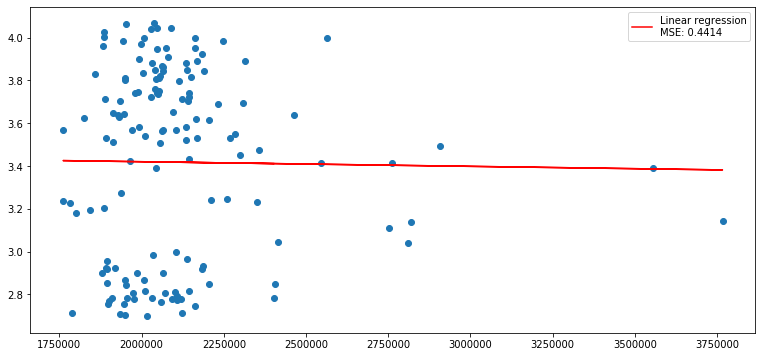

In [175]:
#a) linear

X = bestStore.Weekly_Sales.values.reshape(-1, 1)
y = bestStore.Fuel_Price.values.reshape(-1, 1)

model.fit(X, y)

model.predict(X)

plt.scatter(X, y)
lbl = f"Linear regression\n" + f"MSE: {np.sqrt(mean_squared_error(y, model.predict(X))).round(4)}"
plt.plot(X, model.predict(X), color='red', label=lbl)
plt.legend()
plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


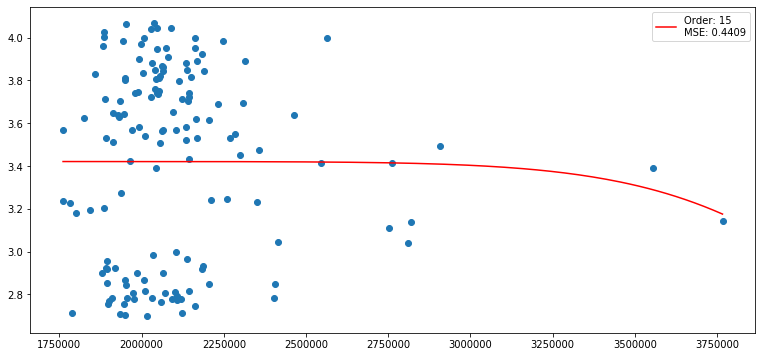

In [176]:
#a) poly order = 15

X = bestStore.Weekly_Sales.values.reshape(-1, 1)
y = bestStore.Fuel_Price.values.reshape(-1, 1)


poly = PolynomialFeatures(degree=15, include_bias=False)

poly_features = poly.fit_transform(X)

model.fit(poly_features, y)

y_predicted = model.predict(poly_features)

model_err = np.sqrt(mean_squared_error(y, y_predicted))

po_model = np.poly1d(np.polyfit(X.flatten(), y_predicted.flatten(), deg=order))
x = np.linspace(X.flatten().min(), X.flatten().max(), len(X.flatten()))

plt.scatter(X, y)
lbl = f"Order: 15\n" + f"MSE: {model_err.round(4)}"
plt.plot(x, po_model(x), c='red', label=lbl)
plt.legend()
plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


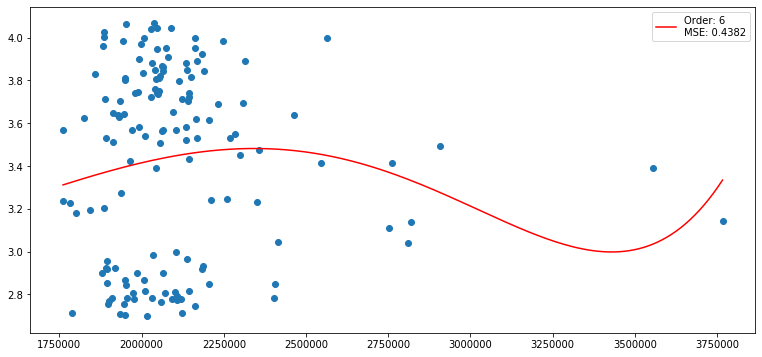

In [177]:
#a) poly order = 6

X = bestStore.Weekly_Sales.values.reshape(-1, 1)
y = bestStore.Fuel_Price.values.reshape(-1, 1)


poly = PolynomialFeatures(degree=6, include_bias=False)

poly_features = poly.fit_transform(X)

model.fit(poly_features, y)

y_predicted = model.predict(poly_features)

model_err = np.sqrt(mean_squared_error(y, y_predicted))

po_model = np.poly1d(np.polyfit(X.flatten(), y_predicted.flatten(), deg=order))
x = np.linspace(X.flatten().min(), X.flatten().max(), len(X.flatten()))

plt.scatter(X, y)
lbl = f"Order: 6\n" + f"MSE: {model_err.round(4)}"
plt.plot(x, po_model(x), c='red', label=lbl)
plt.legend()
plt.show()

As we can see on plots above the smallest error is achived by order = 6 polynominal regression.

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Applications/anaconda3/lib/python3.7/site-package

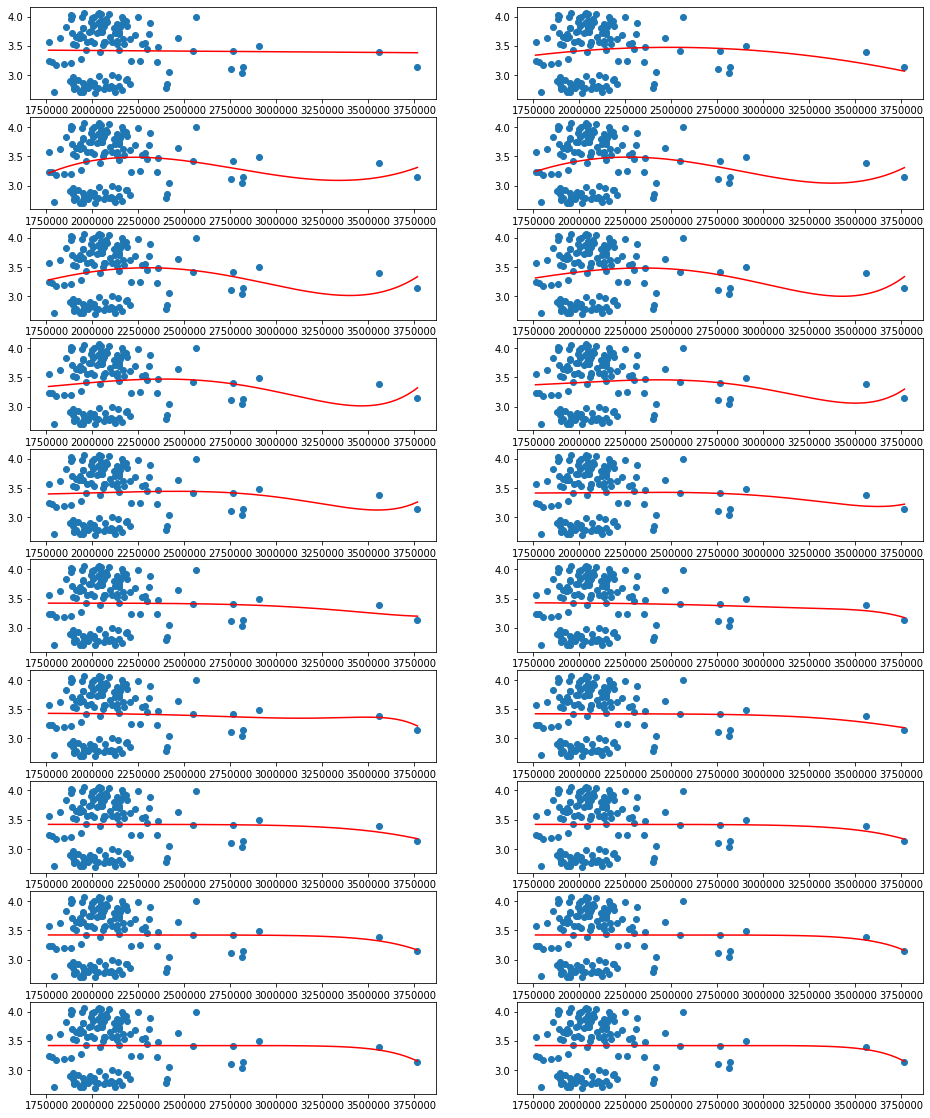

In [178]:
plt.rcParams['figure.figsize'] = [16, 20]
model_err = []

for order in range(1, highest_order+1):
    poly = PolynomialFeatures(degree=order, include_bias=False)

    poly_features = poly.fit_transform(X)

    model.fit(poly_features, y)

    y_predicted = model.predict(poly_features)

    model_err.append(np.sqrt(mean_squared_error(y, y_predicted)))

    po_model = np.poly1d(np.polyfit(X.flatten(), y_predicted.flatten(), deg=order))
    x = np.linspace(X.flatten().min(), X.flatten().max(), len(X.flatten()))
    
    plt.subplot(highest_order/2, 2, order)
    plt.scatter(X, y)
    plt.plot(x, po_model(x), c='red')

plt.show()

In this case we can see that it is likely not worthy to calculate higher polynominals because after 10th iteration the change in shape is very small.

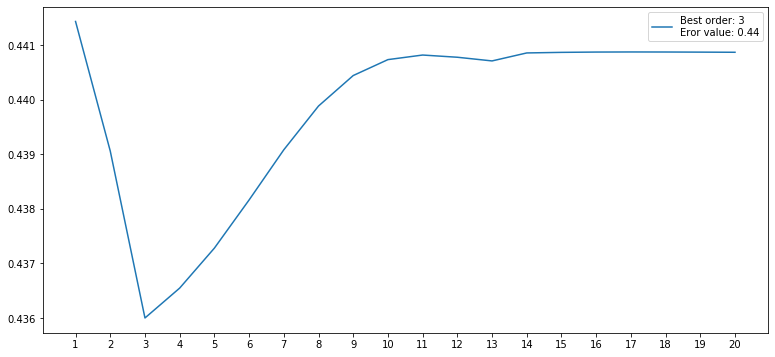

In [179]:
plt.rcParams['figure.figsize'] = [13, 6]
b = min(model_err)
for enum, val in enumerate(model_err):
    if val == b:
        b = enum + 1
lbl = f"Best order: {b}\nEror value: {min(model_err).round(2)}"
plt.plot(np.arange(1, len(model_err)+1, dtype=int), model_err, label=lbl)
plt.xticks(np.arange(1, len(model_err)+1))
plt.legend()
plt.show()

Previosly we analysed order 6 and 15 polynominal regression, and now we calculated that order = 3 is the best. It is because the distribution of points on the plot has changed.

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


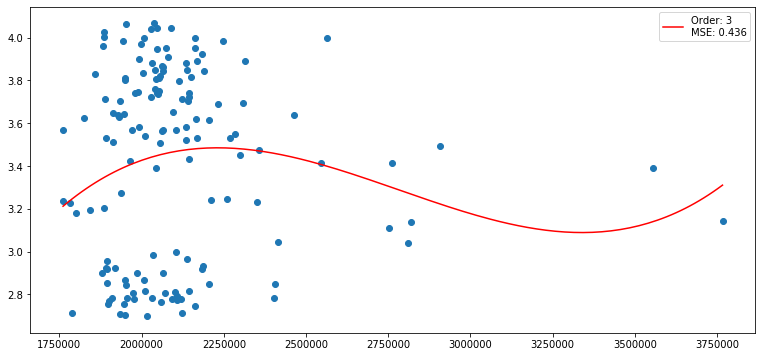

In [180]:
# poly order = 3

X = bestStore.Weekly_Sales.values.reshape(-1, 1)
y = bestStore.Fuel_Price.values.reshape(-1, 1)


poly = PolynomialFeatures(degree=3, include_bias=False)

poly_features = poly.fit_transform(X)

model.fit(poly_features, y)

y_predicted = model.predict(poly_features)

model_err = np.sqrt(mean_squared_error(y, y_predicted))

po_model = np.poly1d(np.polyfit(X.flatten(), y_predicted.flatten(), deg=order))
x = np.linspace(X.flatten().min(), X.flatten().max(), len(X.flatten()))

plt.scatter(X, y)
lbl = f"Order: 3\n" + f"MSE: {model_err.round(4)}"
plt.plot(x, po_model(x), c='red', label=lbl)
plt.legend()
plt.show()

As we would expect, for order = 3 we get smaller error value than 6 and 15 order and for linerar regression.

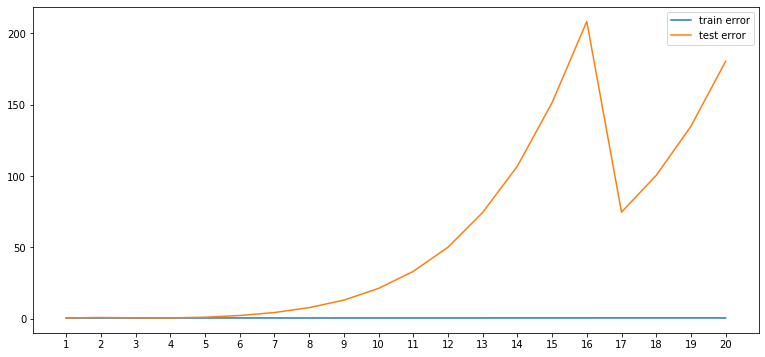

In [181]:
testErr, trainErr = [], []

for order in range(1, highest_order+1):
    poly = PolynomialFeatures(degree=order, include_bias=False)

    poly_features = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=12)

    model.fit(X_train, y_train)

    y_predicted_train = model.predict(X_train)
    y_predicted_test = model.predict(X_test)

    trainErr.append(np.sqrt(mean_squared_error(y_train, y_predicted_train)))
    testErr.append(np.sqrt(mean_squared_error(y_test, y_predicted_test)))


plt.plot(np.arange(1, len(trainErr)+1, dtype=int), trainErr, label='train error')
plt.plot(np.arange(1, len(testErr)+1, dtype=int), testErr, label='test error')
plt.xticks(np.arange(1, len(trainErr)+1))
plt.legend()
plt.show()

This plot of train and test error is pretty odd. I think this is because weekly sales to fuel price is a bad correlation. The point distribution of points in previous scatterplots is not optimal for polynominal regression.

In [182]:
#b) Let's propose model, which uses CPI, fuel price and all of their interactions up to third degree

X = walmartg_sales_df[['CPI', 'Fuel_Price']].values.reshape(-1, 2)
y = walmartg_sales_df.Weekly_Sales.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MSE1: {0}".format(mean_squared_error(y_pred, y_test)))
MSE1 = np.sqrt(mean_squared_error(y_pred, y_test))

#Your model:

X = walmartg_sales_df[['CPI', 'Fuel_Price', 'Unemployment']].values.reshape(-1, 3)
y = walmartg_sales_df.Weekly_Sales.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MSE2: {0}".format(mean_squared_error(y_pred, y_test)))
MSE2 = np.sqrt(mean_squared_error(y_pred, y_test))

print("MSE2 < MSE1:", MSE2 < MSE1)

MSE1: 319324281646.49164
MSE2: 295323389498.7036
MSE2 < MSE1: True


After applying just one feature I achived lower error. There wasn't a lot of attributes in this dataset, so adding any of remaining attributes is a significant change and will make our polynominal regression better.